洗刷原始JSON，生成新的CSV

In [1]:
import json
import csv

# 洗刷获取到的数据
with open("data.json", "r", encoding="utf-8") as f:
    raw_data = json.load(f)

with open("records.csv", "w", newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["date", "amount", "merchant"])  # 写表头

    for record in raw_data["data"]["records"]:
        if record.get("turnoverType") == "消费":
            date = record.get("jndatetimeStr", "")
            amount = record.get("tranamt", 0) / 100  # 分转元
            merchant = record.get("resume", "")
            writer.writerow([date, f"{amount:.2f}", merchant])


读取洗刷好的数据，将其进一步按月份归类

In [2]:
import pandas as pd

# 读取原始数据
df = pd.read_csv("records.csv")

# 转换为日期
df["date"] = pd.to_datetime(df["date"])

# 提取年月（作为字符串或Period）
df["month"] = df["date"].dt.to_period("M").astype(str)

# 按月汇总
monthly_sum = df.groupby("month")["amount"].sum().reset_index()
monthly_sum["amount"] = monthly_sum["amount"].round(2)

# 保存结果
monthly_sum.to_csv("monthly_summary.csv", index=False)

print(monthly_sum)

     month  amount
0  2024-12  556.82
1  2025-01  393.54
2  2025-02  136.90
3  2025-03  738.56
4  2025-04  891.96


读取洗刷好的数据，将其进一步按日归类

In [3]:
# 读取CSV
df = pd.read_csv("records.csv")

# 转换日期格式，只保留年月日部分
df["date"] = pd.to_datetime(df["date"]).dt.date

# 按天求和
daily_sum = df.groupby("date")["amount"].sum().reset_index()

# 四舍五入到2位小数
daily_sum["amount"] = daily_sum["amount"].round(2)

# 保存结果
daily_sum.to_csv("daily_summary.csv", index=False)

print(daily_sum.head())


         date  amount
0  2024-12-13   17.00
1  2024-12-14   24.00
2  2024-12-15   24.96
3  2024-12-16   37.00
4  2024-12-17   21.50


生成月份图

C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\2286872987.py:12: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\2286872987.py:12: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\2286872987.py:12: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\2286872987.py:12: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\2286872987.py:12: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\2286872987.py:12: UserWarning: Gl

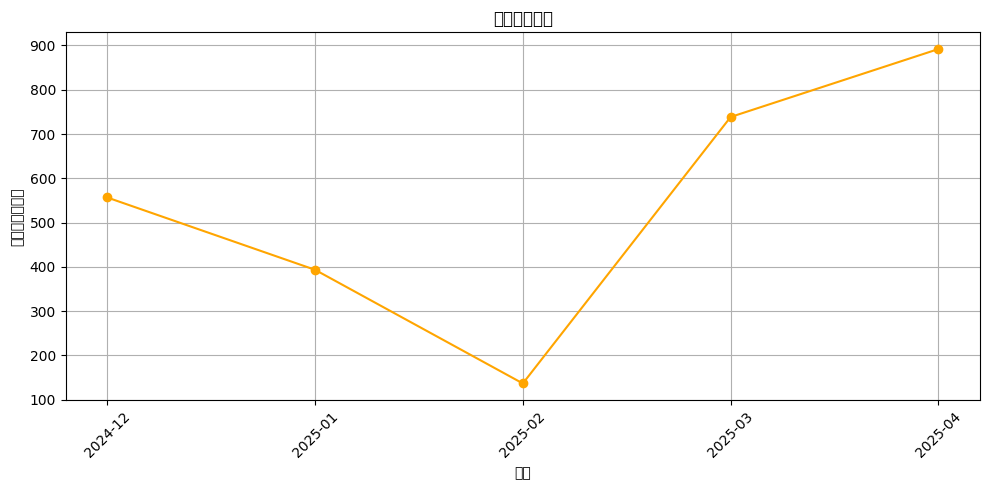

In [4]:
from matplotlib import pyplot as plt

df = pd.read_csv("monthly_summary.csv")

plt.figure(figsize=(10, 5))
plt.plot(df["month"], df["amount"], marker="o", linestyle="-", color="orange")
plt.title("每月消费趋势")
plt.xlabel("月份")
plt.ylabel("消费金额（元）")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_trend.png")
plt.show()

生成日图

C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\789798654.py:12: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\789798654.py:12: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\789798654.py:12: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\789798654.py:12: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\789798654.py:12: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6068\789798654.py:12: UserWarning: Glyph 39

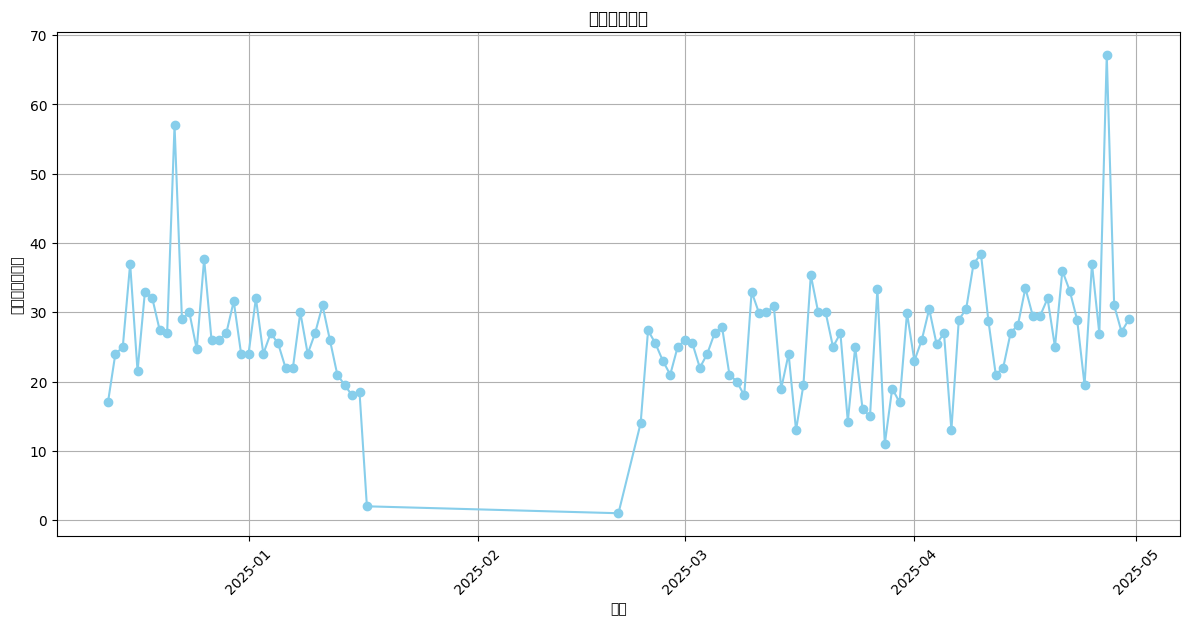

In [5]:
# 读取按天汇总的数据
df = pd.read_csv("daily_summary.csv")
df["date"] = pd.to_datetime(df["date"])

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["amount"], marker='o', linestyle='-', color='skyblue')
plt.title("每日消费趋势")
plt.xlabel("日期")
plt.ylabel("消费金额（元）")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("trend.png")  # 保存为图片
plt.show()



预测明天

预测下一天的消费金额为：26.97 元


C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\2031166625.py:43: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\2031166625.py:43: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\2031166625.py:43: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\2031166625.py:43: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\2031166625.py:43: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\2031166625.py:43: UserWarning: Gl

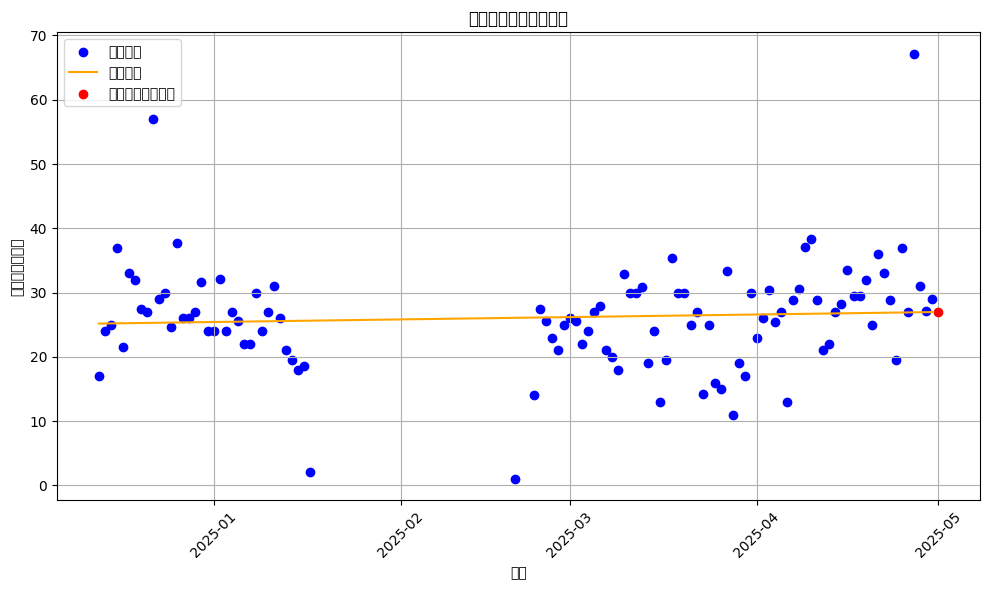

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("daily_summary.csv")

# 转换为日期类型
df["date"] = pd.to_datetime(df["date"])

# 计算距开始日期的天数
df["days_since_start"] = (df["date"] - df["date"].min()).dt.days

# 准备训练数据
X = df["days_since_start"].values.reshape(-1, 1)
y = df["amount"].values

# 拟合线性回归
model = LinearRegression()
model.fit(X, y)

# 预测下一天
next_day = df["days_since_start"].max() + 1
predicted = model.predict([[next_day]])[0]

print(f"预测下一天的消费金额为：{predicted:.2f} 元")

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(df["date"], y, color='blue', label='历史消费')
plt.plot(df["date"], model.predict(X), color='orange', label='线性拟合')

# 预测点可视化
next_date = df["date"].max() + pd.Timedelta(days=1)
plt.scatter([next_date], [predicted], color='red', label='预测点（下一天）', zorder=5)

plt.title("饭卡每日消费金额趋势")
plt.xlabel("日期")
plt.ylabel("消费金额（元）")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

预测下个月

预测下月的消费金额为：848.15 元


C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\3177997322.py:42: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\3177997322.py:42: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\3177997322.py:42: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\3177997322.py:42: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\3177997322.py:42: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chiu-xaH\AppData\Local\Temp\ipykernel_6448\3177997322.py:42: UserWarning: Gl

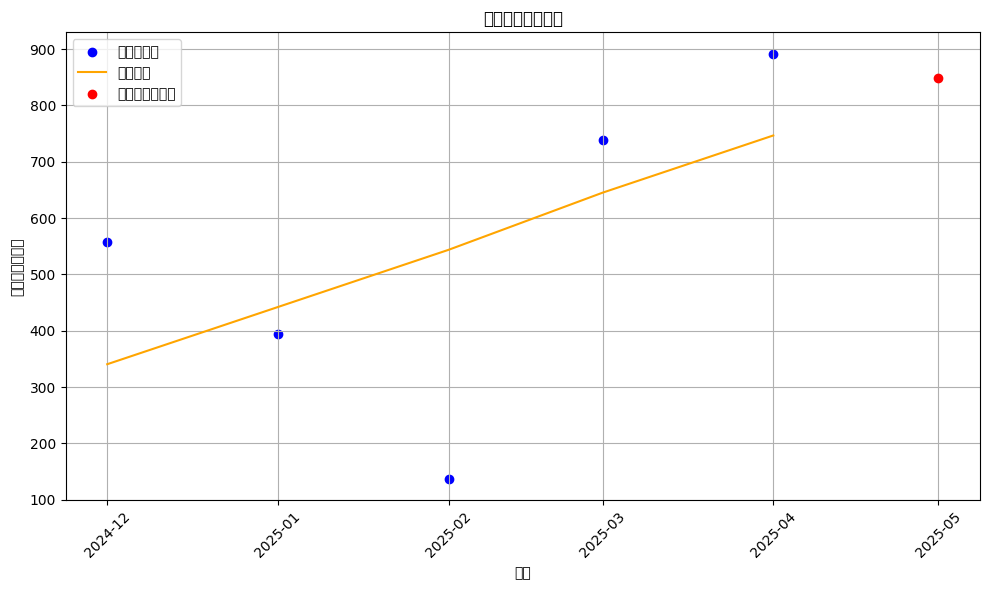

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 读取按月数据
df = pd.read_csv("monthly_summary.csv")

# 把月份转为 datetime 再转为月份编号
df["month"] = pd.to_datetime(df["month"])
df["months_since_start"] = (df["month"].dt.to_period("M") - df["month"].min().to_period("M")).apply(lambda x: x.n)

# 拟合
X = df["months_since_start"].values.reshape(-1, 1)
y = df["amount"].values

model = LinearRegression()
model.fit(X, y)

# 预测下一个月
next_month = df["months_since_start"].max() + 1
predicted = model.predict([[next_month]])[0]

# 下一个月的真实日期（可视化用）
next_month_date = (df["month"].max() + pd.DateOffset(months=1))


print(f"预测下月的消费金额为：{predicted:.2f} 元")

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(df["month"], y, color='blue', label='历史月消费')
plt.plot(df["month"], model.predict(X), color='orange', label='线性拟合')

# 显示预测点
plt.scatter([next_month_date], [predicted], color='red', label='预测点（下月）', zorder=5)

plt.title("饭卡每月消费趋势")
plt.xlabel("月份")
plt.ylabel("消费金额（元）")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()